In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('C:/Users/vpras/OneDrive/Desktop/Sixth Sem/ML/TechIntern/Task2/heart.csv')

print(dataset.dtypes)


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [3]:
print(" No of rows = ", len(dataset), "\n")
dataset = dataset.drop_duplicates()

print("\n  No of rows after duplicates were removed = ", len(dataset))

 No of rows =  918 


  No of rows after duplicates were removed =  918


In [4]:
dataset.isnull().sum() # no null values
# dataset.dropna()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:

le=LabelEncoder()

dataset['Sex']=le.fit_transform(dataset['Sex'])
dataset['ChestPainType']=le.fit_transform(dataset['ChestPainType'])
dataset['RestingECG']=le.fit_transform(dataset['RestingECG'])
dataset['ExerciseAngina']=le.fit_transform(dataset['ExerciseAngina'])
dataset['ST_Slope']=le.fit_transform(dataset['ST_Slope'])


In [6]:
dataset.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

In [23]:
X = dataset.iloc[: ,:-1].values # avoidng last column heart disease
Y = dataset.iloc[:, -1].values # dependent attribute is the disease

# split data into training and testing sets 80 - 20 size
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [8]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Evaluate the model using metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_binary))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_binary))
print('R-squared score:', r2_score(y_test, y_pred_binary))

print("Accuracy in percentage : {:.3f} % ".format( accuracy_score(y_test, y_pred_binary) * 100 )  )

Mean Squared Error: 0.16304347826086957
Mean Absolute Error: 0.16304347826086957
R-squared score: 0.3300157786139095
Accuracy in percentage : 83.696 % 


## Random Forest

In [9]:
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
# make predictions
y_pred2 = model.predict(X_test)
threshold = 0.5
y_pred2_binary = (y_pred2 >= threshold).astype(int)

# evaluate predictions
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2_binary))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2_binary))
print('R-squared score:', r2_score(y_test, y_pred2_binary))

print("Accuracy in percentage : {:.3f} % ".format( accuracy_score(y_test, y_pred2_binary) * 100 )  )

Mean Squared Error: 0.14130434782608695
Mean Absolute Error: 0.14130434782608695
R-squared score: 0.41934700813205494
Accuracy in percentage : 85.870 % 


## K-Nearest Neighbors Regressor



In [15]:

# create the model
model = KNeighborsRegressor(n_neighbors=5)

# train the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate predictions
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

# convert predictions to binary values
threshold = 0.6
y_pred_binary = (y_pred >= threshold).astype(int)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary) 
print("Accuracy: {:.2f}%".format(accuracy*100))


Mean Squared Error: 0.11978260869565219
Mean Absolute Error: 0.225
R-squared score: 0.09686126957154995
Accuracy: 79.11%


## Neural Network MLP Regressor

In [18]:
from sklearn.neural_network import MLPRegressor

# initialize the model with desired hyperparameters
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)

# fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)


# Evaluate the performance of the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: {:.2f}%".format(accuracy*100))

Mean Squared Error: 0.1970436230870576
Mean Absolute Error: 0.2711892455164624
R-squared score: -0.17953014968265824
Accuracy: 83.46%


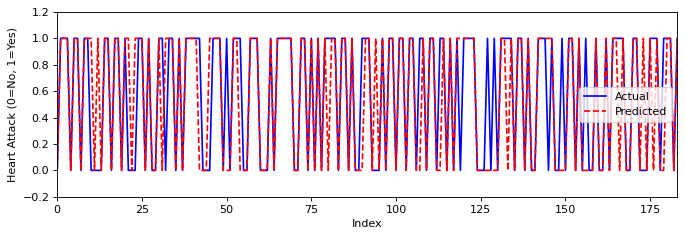

In [22]:


# Create x-axis data from 0 to the length of y_test
x_size = np.arange(len(y_test))

# Create a figure and specify the size and DPI
plt.figure(figsize=(10, 3), dpi=80)

# Plot actual y_test as a blue solid line
plt.plot(x_size, y_test, 'b-', label='Actual')

# Plot predicted y_pred2_binary as red dashed line
plt.plot(x_size, y_pred2_binary, 'r--', label='Predicted')

# Set different scales for x and y axes
plt.xlim(0, len(y_test)-1)
plt.ylim(-0.2, 1.2)

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Heart Attack (0=No || 1=Yes)')

# Show the plot
plt.show()
